<a href="https://colab.research.google.com/github/2303A52491/Generative_AI/blob/main/GAI__lab_7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6422 - loss: 0.6455 - val_accuracy: 0.6364 - val_loss: 0.6555
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6508 - loss: 0.6507 - val_accuracy: 0.6364 - val_loss: 0.6394
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6552 - loss: 0.6398 - val_accuracy: 0.6364 - val_loss: 0.6346
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6668 - loss: 0.6204 - val_accuracy: 0.6364 - val_loss: 0.6343
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6822 - loss: 0.6175 - val_accuracy: 0.6364 - val_loss: 0.6282
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6392 - loss: 0.6373 - val_accuracy: 0.6364 - val_loss: 0.6318
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6275 - loss: 0.6409 - val_accuracy: 0.6364 - val_loss: 0.6264
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6421 - loss: 0.6312 - val_accuracy: 0.63

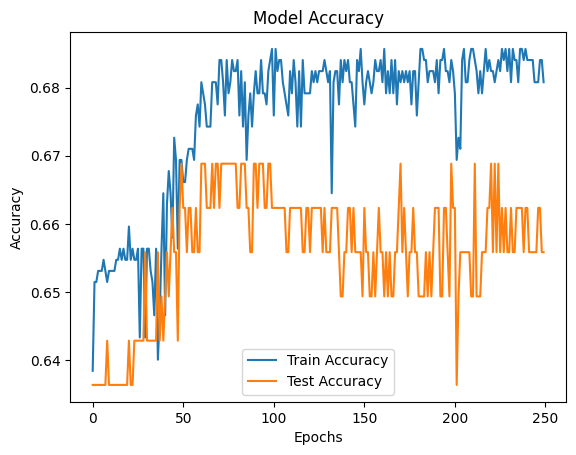

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from flask import Flask, request, jsonify

# Step 1: Load and preprocess the dataset
data = pd.read_csv("/content/diabetes.csv")

# Preprocess the data (adjust based on the actual dataset)
X = data.iloc[:, :-1].values  # Features (all columns except last)
y = data.iloc[:, -1].values   # Target (diabetic disease: 1 or 0)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the ANN model
model = Sequential()

# Hidden layers with specified architecture
model.add(Dense(10, input_dim=X_train.shape[1], activation='tanh'))  # Hidden Layer 1
model.add(Dense(15, activation='tanh'))  # Hidden Layer 2
model.add(Dense(20, activation='tanh'))  # Hidden Layer 3
model.add(Dense(10, activation='tanh'))  # Hidden Layer 4
model.add(Dense(5, activation='tanh'))  # Hidden Layer 5

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Step 3: Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

# Step 5: Evaluate the model
train_accuracy = model.evaluate(X_train, y_train)
test_accuracy = model.evaluate(X_test, y_test)

print(f'Training Accuracy: {train_accuracy[1]:.4f}')
print(f'Testing Accuracy: {test_accuracy[1]:.4f}')

# Step 6: Predictions and evaluation metrics
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification report (Precision, Recall, F1-Score)
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 7: Save the model
model.save('diabetes_model.h5')